In [11]:
import pandas as pd

df = pd.read_csv("Month_Value_1.csv")

df['Period'] = pd.to_datetime(df['Period'], format='%d.%m.%Y')

df.set_index('Period', inplace=True)

df = df.loc[:'2020-04-30']

print("First few rows:")
print(df.head())
print("\nLast few rows:")
print(df.tail())

First few rows:
                 Revenue  Sales_quantity  Average_cost  \
Period                                                   
2015-01-01  1.601007e+07         12729.0   1257.763541   
2015-02-01  1.580759e+07         11636.0   1358.507000   
2015-03-01  2.204715e+07         15922.0   1384.697024   
2015-04-01  1.881458e+07         15227.0   1235.606705   
2015-05-01  1.402148e+07          8620.0   1626.621765   

            The_average_annual_payroll_of_the_region  
Period                                                
2015-01-01                                30024676.0  
2015-02-01                                30024676.0  
2015-03-01                                30024676.0  
2015-04-01                                30024676.0  
2015-05-01                                30024676.0  

Last few rows:
                 Revenue  Sales_quantity  Average_cost  \
Period                                                   
2019-12-01  5.875647e+07         38069.0   1543.420464   
20

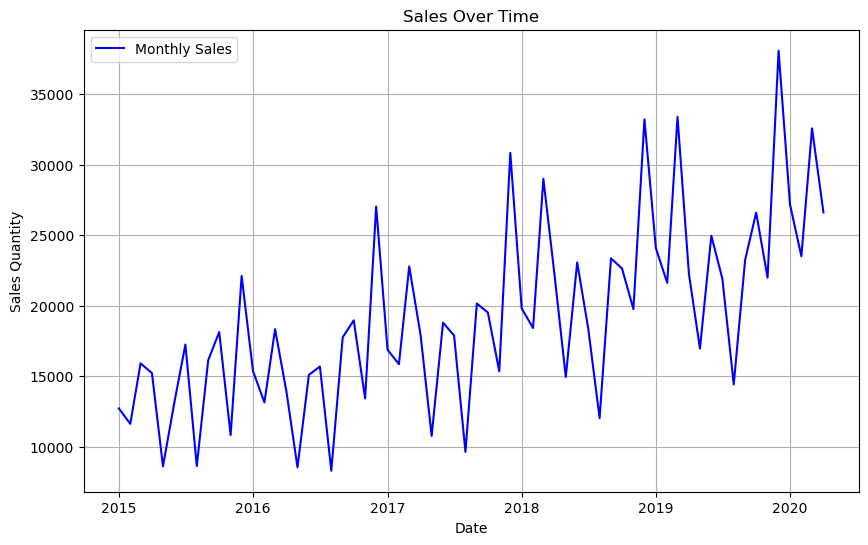

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) 
plt.plot(df['Sales_quantity'], label='Monthly Sales', color='blue') 
plt.title('Sales Over Time') 
plt.xlabel('Date') 
plt.ylabel('Sales Quantity') 
plt.legend() 
plt.grid(True)
plt.show()

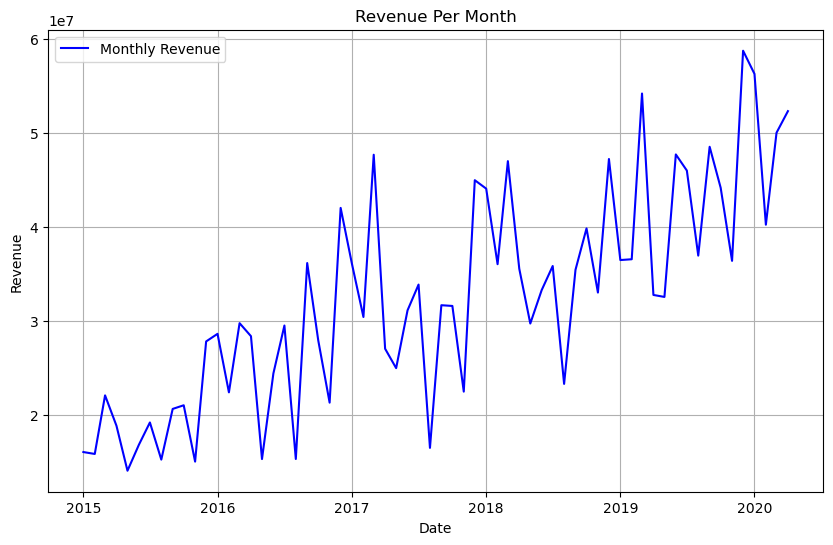

In [13]:
plt.figure(figsize=(10, 6)) 
plt.plot(df['Revenue'], label='Monthly Revenue', color='blue')  
plt.title('Revenue Per Month')  
plt.xlabel('Date')  
plt.ylabel('Revenue')  
plt.legend() 
plt.grid(True)  
plt.show()

Full data range: 2015-01-01 00:00:00 to 2020-04-01 00:00:00
Total months: 64

Model Performance Metrics:
Mean Absolute Error (MAE): 4595.00
Mean Squared Error (MSE): 37657978.42
Root Mean Squared Error (RMSE): 6136.61
Mean Absolute Percentage Error (MAPE): 0.21


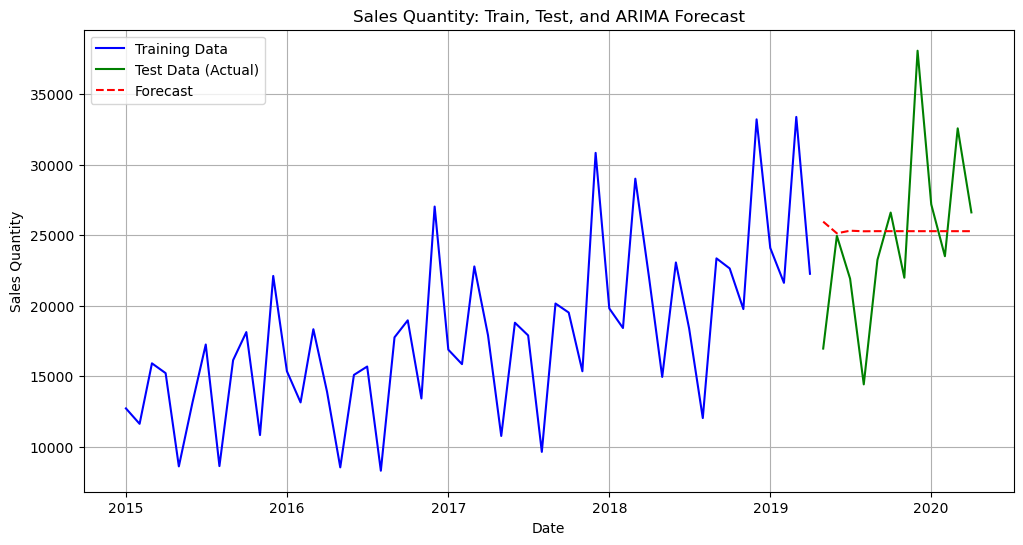

In [34]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

print("Full data range:", df.index.min(), "to", df.index.max())
print("Total months:", len(df))

# Split into train and test (last 12 months for test)
test_size = 12
train = df.iloc[:-test_size] 
test = df.iloc[-test_size:]   

model = ARIMA(train['Sales_quantity'], order=(1, 1, 1))
results = model.fit()

forecast = results.forecast(steps=test_size)

mae = mean_absolute_error(test['Sales_quantity'], forecast)
mse = mean_squared_error(test['Sales_quantity'], forecast)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test['Sales_quantity'], forecast)

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train['Sales_quantity'], label='Training Data', color='blue')
plt.plot(test['Sales_quantity'], label='Test Data (Actual)', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.title('Sales Quantity: Train, Test, and ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'



Model Performance Metrics:
Mean Absolute Error (MAE): 2223.94
Mean Squared Error (MSE): 6344474.38
Root Mean Squared Error (RMSE): 2518.82
Mean Absolute Percentage Error (MAPE): 0.09


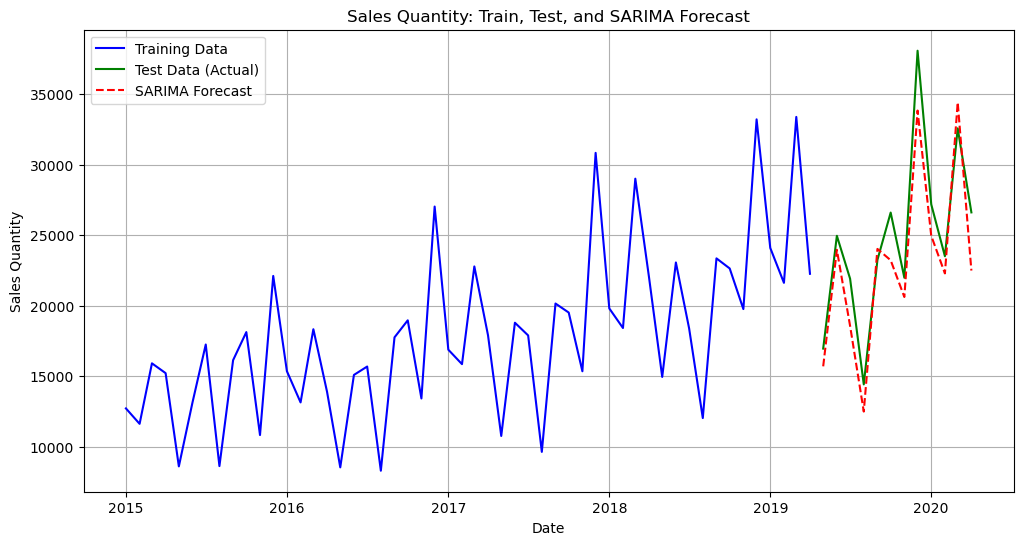

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

test_size = 12
train = df.iloc[:-test_size]  
test = df.iloc[-test_size:]  

model = SARIMAX(train['Sales_quantity'], 
                order=(1, 1, 1),              # Non-seasonal: AR(1), diff(1), MA(1)
                seasonal_order=(1, 1, 1, 12)) # Seasonal: AR(1), diff(1), MA(1), period=12
results = model.fit()

forecast = results.forecast(steps=test_size)

mae = mean_absolute_error(test['Sales_quantity'], forecast)
mse = mean_squared_error(test['Sales_quantity'], forecast)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test['Sales_quantity'], forecast)

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(train['Sales_quantity'], label='Training Data', color='blue')
plt.plot(test['Sales_quantity'], label='Test Data (Actual)', color='green')
plt.plot(test.index, forecast, label='SARIMA Forecast', color='red', linestyle='--')
plt.title('Sales Quantity: Train, Test, and SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True)
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=712.580, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=716.558, Time=0.24 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=712.790, Time=0.11 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=755.755, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=713.160, Time=0.08 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=712.304, Time=0.07 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=713.959, Time=0.08 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=715.424, Time=0.17 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=712.313, Time=0.44 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=715.312, Time=0.33 sec
 ARIMA(0,0,0)(0,1,1)[12]             : AIC=752.203, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,1,1)[12] intercept
Total fit time: 2.945 seconds
                             

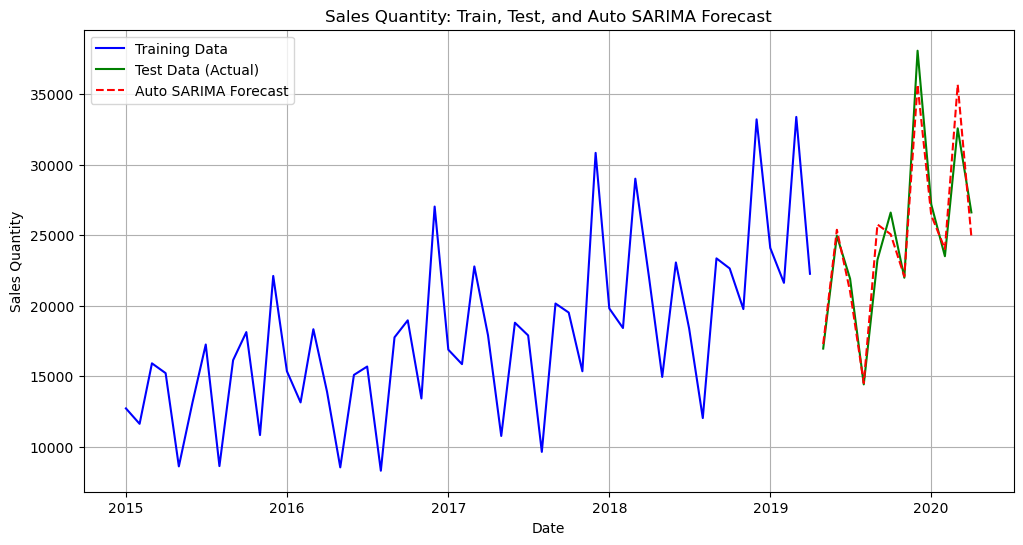

In [32]:
from pmdarima import auto_arima

# Auto-fit SARIMA
auto_model = auto_arima(train['Sales_quantity'], 
                        seasonal=True, 
                        m=12,  # Monthly seasonality
                        stepwise=True, 
                        trace=True)  # Shows the steps it tries
print(auto_model.summary())

forecast = auto_model.predict(n_periods=test_size)

mae = mean_absolute_error(test['Sales_quantity'], forecast)
mse = mean_squared_error(test['Sales_quantity'], forecast)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test['Sales_quantity'], forecast)

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(train['Sales_quantity'], label='Training Data', color='blue')
plt.plot(test['Sales_quantity'], label='Test Data (Actual)', color='green')
plt.plot(test.index, forecast, label='Auto SARIMA Forecast', color='red', linestyle='--')
plt.title('Sales Quantity: Train, Test, and Auto SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True)
plt.show()